In [ ]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
df = pd.read_csv('Stock Prices.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Unnamed: 0,Date,open,high,low,close,volume,ticker
0,0,2023-01-10,14.560,15.200,14.5600,15.19,31109866,AAL
1,1,2023-02-13,16.250,16.600,16.2100,16.51,15649916,AAL
2,2,2023-01-12,16.030,16.900,15.8750,16.83,96441833,AAL
3,3,2023-01-13,16.220,17.070,16.0101,17.02,50828019,AAL
4,4,2023-01-17,16.900,17.120,16.7400,17.08,32875679,AAL
5,5,2023-01-18,17.530,17.640,16.5950,16.64,42352629,AAL
6,6,2023-01-19,16.412,16.490,16.0100,16.28,32630227,AAL
7,7,2023-01-20,16.370,16.535,16.1400,16.34,22487696,AAL
8,8,2023-01-23,16.390,16.440,16.1600,16.17,23408546,AAL
9,9,2023-01-24,16.010,16.430,15.9600,16.02,21641482,AAL


In [ ]:
df.shape

(700, 8)

In [ ]:
df.describe()

,Unnamed: 0,open,high,low,close,volume
count,700.00000,700.000000,700.000000,700.000000,700.000000,7.000000e+02
mean,349.50000,167.001517,169.621187,164.871081,167.524443,5.475801e+07
std,202.21688,103.354092,104.889819,102.055144,103.586977,4.900573e+07
min,0.00000,12.855000,13.055000,12.650000,12.740000,2.657898e+06
25%,174.75000,98.410000,100.396350,97.282500,98.807500,2.286773e+07
50%,349.50000,152.725000,154.557500,151.025000,153.455000,3.986599e+07
75%,524.25000,254.052500,255.522500,250.562500,252.987500,6.758771e+07
max,699.00000,402.890000,407.520000,395.900000,403.130000,3.065906e+08


In [ ]:
df.info() # summary of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   Date        700 non-null    object 
 2   open        700 non-null    float64
 3   high        700 non-null    float64
 4   low         700 non-null    float64
 5   close       700 non-null    float64
 6   volume      700 non-null    int64  
 7   ticker      700 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 43.9+ KB


In [ ]:
df.isnull().sum() # There are no null values in the dataset

Unnamed: 0    0
Date          0
open          0
high          0
low           0
close         0
volume        0
ticker        0
dtype: int64

In [ ]:
df = df[['Date','open','close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
Date,,
2023-01-10,14.560,15.19
2023-02-13,16.250,16.51
2023-01-12,16.030,16.83
2023-01-13,16.220,17.02
2023-01-17,16.900,17.08
2023-01-18,17.530,16.64
2023-01-19,16.412,16.28
2023-01-20,16.370,16.34
2023-01-23,16.390,16.17


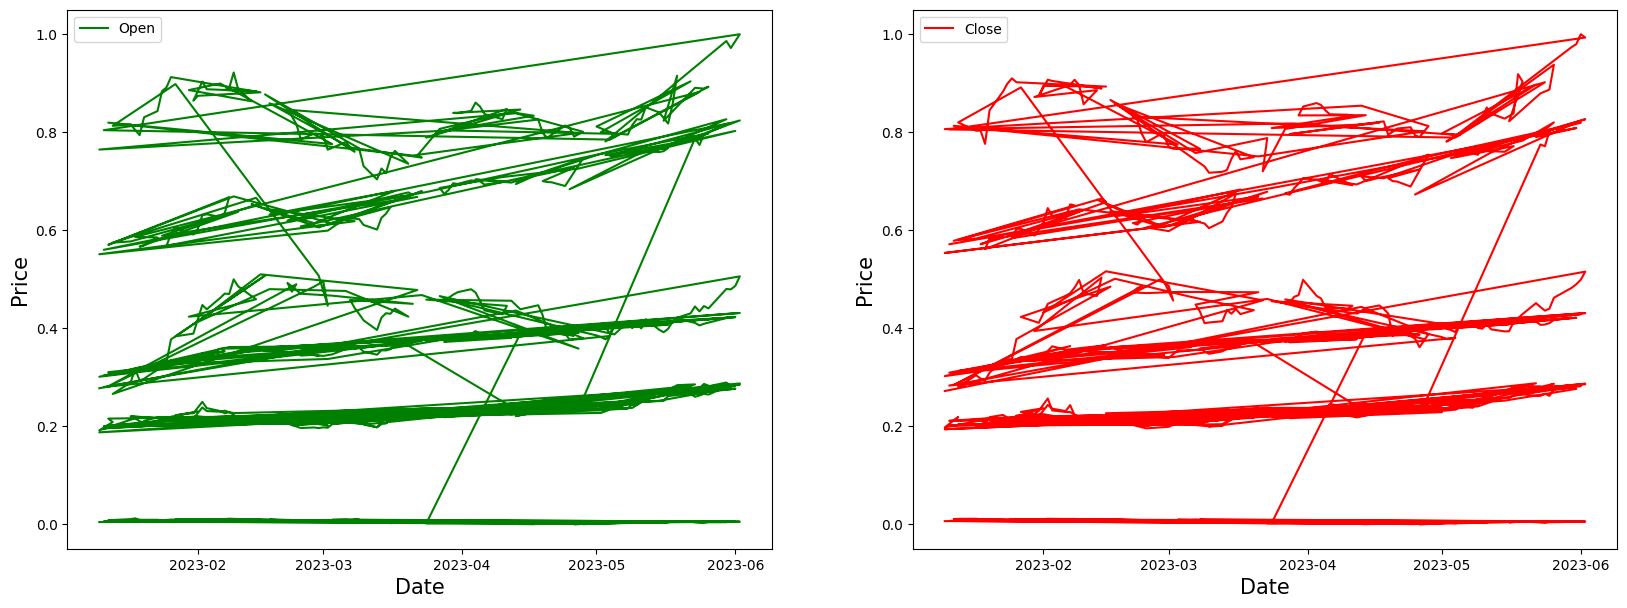

In [47]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [ ]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
Date,,
2023-01-10,0.004371,0.006276
2023-02-13,0.008704,0.009657
2023-01-12,0.008140,0.010477
2023-01-13,0.008627,0.010963
2023-01-17,0.010371,0.011117
2023-01-18,0.011986,0.009990
2023-01-19,0.009120,0.009068
2023-01-20,0.009012,0.009222
2023-01-23,0.009063,0.008786


In [ ]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

525

In [ ]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((525, 2), (175, 2))

In [ ]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((475, 50, 2), (475, 2), (125, 50, 2), (125, 2))

In [ ]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 114ms/step - loss: 0.0493 - mean_absolute_error: 0.1614 - val_loss: 0.0137 - val_mean_absolute_error: 0.0909
Epoch 2/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0108 - mean_absolute_error: 0.0690 - val_loss: 0.0118 - val_mean_absolute_error: 0.0791
Epoch 3/100
15/15 [==============================] - 1s 82ms/step - loss: 0.0077 - mean_absolute_error: 0.0568 - val_loss: 0.0117 - val_mean_absolute_error: 0.0753
Epoch 4/100
15/15 [==============================] - 1s 91ms/step - loss: 0.0067 - mean_absolute_error: 0.0457 - val_loss: 0.0106 - val_mean_absolute_error: 0.0703
Epoch 5/100
15/15 [==============================] - 1s 69ms/step - loss: 0.0065 - mean_absolute_error: 0.0428 - val_loss: 0.0094 - val_mean_absolute_error: 0.0670
Epoch 6/100
15/15 [==============================] - 1s 53ms/step - loss: 0.0065 - mean_absolute_error: 0.0451 - val_loss: 0.0084 - val_mean_absolute_error: 0.0668
Epoch 7/100
15/

In [ ]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

4/4 [==============================] - 2s 14ms/step


array([[0.7741805 , 0.77774996],
       [0.8041813 , 0.80740684],
       [0.7882283 , 0.7917496 ],
       [0.8580441 , 0.86144966],
       [0.86362034, 0.86766475]], dtype=float32)

In [ ]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[314.81247, 316.3658 ],
       [326.51382, 327.94354],
       [320.2916 , 321.83112],
       [347.52222, 349.04132],
       [349.69714, 351.46765]], dtype=float32)

In [ ]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-125:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-125:].index)], axis=1)

In [ ]:
# Inversing normalization/scaling
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
Date,,,,
2023-01-12,332.500,330.13,314.812469,316.365814
2023-03-03,315.450,315.18,326.513824,327.943542
2023-02-06,363.642,361.48,320.291595,321.831116
2023-01-30,358.440,353.11,347.522217,349.041321
2023-02-13,349.500,358.57,349.697144,351.467651


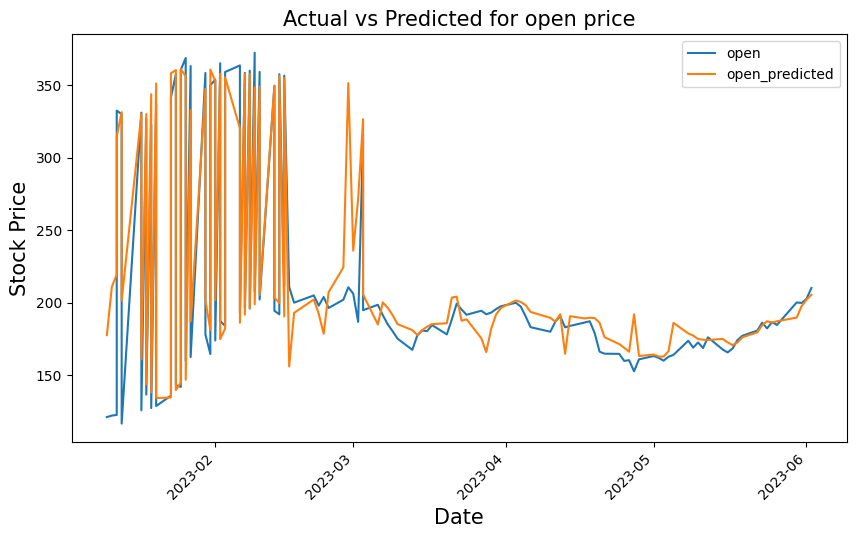

In [ ]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

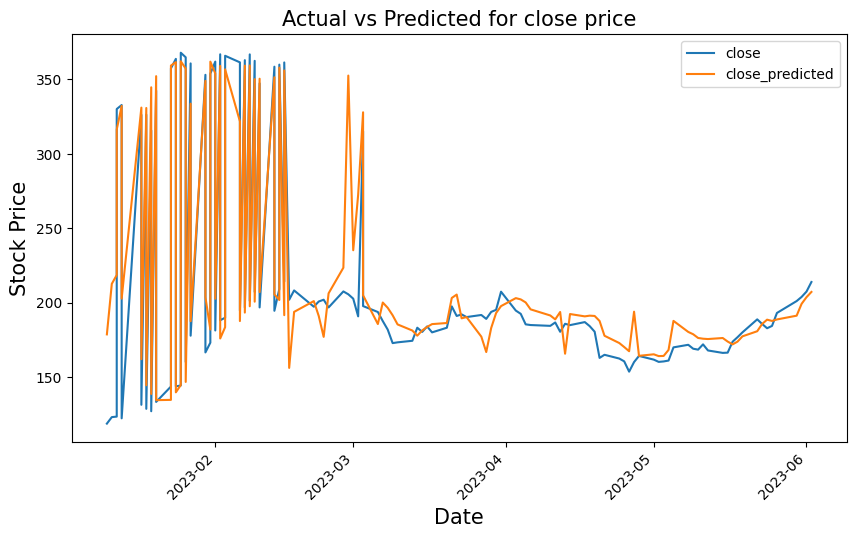

In [ ]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [ ]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-02-14':'2023-02-26']

,open,close,open_predicted,close_predicted
2023-02-14,357.550,359.96,356.495087,357.909180
2023-02-15,356.630,361.42,354.949036,356.036621
2023-02-23,203.910,202.07,178.506851,177.109924
2023-02-22,197.930,200.86,192.298645,191.145599
2023-02-21,204.990,197.37,202.180405,201.141251
2023-02-24,196.325,196.88,207.154999,206.344955
2023-02-17,199.985,208.31,192.966415,193.892242
2023-02-15,211.755,214.24,190.503952,191.686493
2023-02-16,210.780,202.04,155.990585,156.263290
2023-02-14,191.940,209.25,199.755447,201.887741


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 51ms/step


In [ ]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

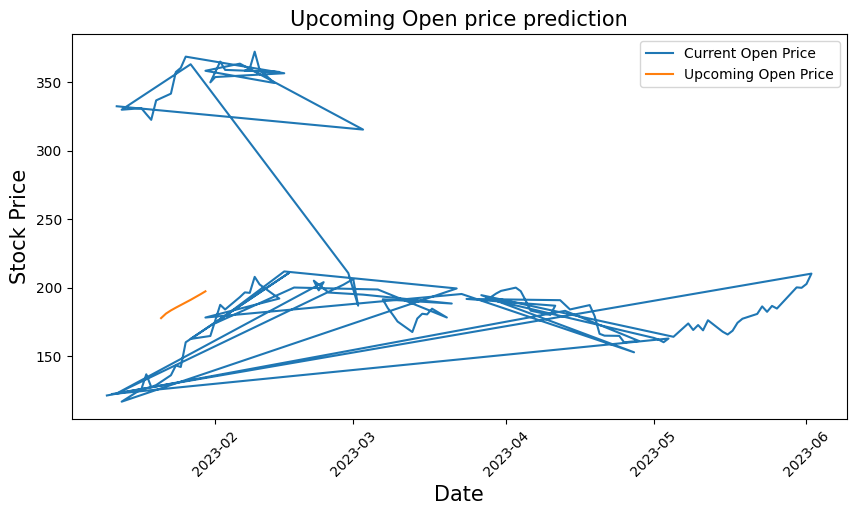

In [ ]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

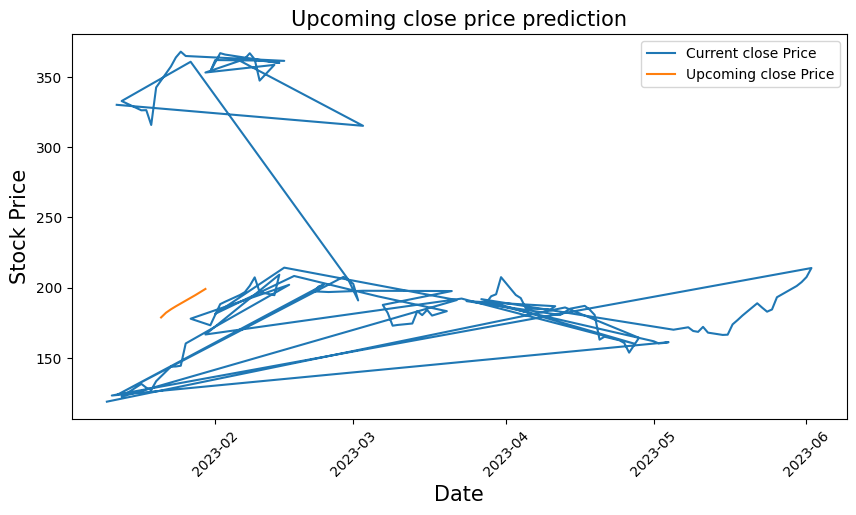

In [ ]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()